# ATKEMPER
# TODO:::::
DUCK vs Skinner_O vs Skinner_O_20(max)

In [1]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.patches as mpatches
import math
import pylab
import seaborn as sns
import re
import collections

cwd = os.getcwd()
cwd

'/Users/chuyinghe/Documents/duckdb-visualization/data/ATKEMPER4/execution-chunk-simu-reward-a/final_data_w_s2'

In [2]:
green_diamond = dict(markerfacecolor='white', marker='o', linestyle='none')
tum_colors = ['#0065BD', '#005293', '#003359',  
              '#808080', '#CCCCC6', '#DAD7CB']
sns.set_theme(font='serif')

In [3]:
# csv = cwd + '/duck_vs_a20.csv'
# csv = cwd + '/duck_vs_skinner100.csv'
# csv = cwd + '/duck_vs_skinner20_skinner_1000.csv'
# csv = cwd + '/final.csv' # ⚠️ IN THE PAPER 
csv = cwd + '/final_data.csv' 
data = pd.read_csv(csv)  
data.shape
# data.head()
data['optimizer'].unique()

array(['Max20Stop5', 'Max20Stop2', 'Max100Stop2', 'Max1000Stop2'],
      dtype=object)

# 1. Data preparation
%1) add table_amount\
%2) add edge_amount\
3) add ratio = Preparation:Execution\
4) add label_total duck-prone(0) & skinner-prone(1)\
5) add label_prep duck-prone(0) & skinner-prone(1)\
6) add label_exec duck-prone(0) & skinner-prone(1)

In [4]:
conditions_table = [
    (data['query'].isin(['3a.sql','3b.sql','3c.sql'])),
    (data['query'].isin(['1a.sql','1b.sql','1c.sql','1d.sql','2a.sql','2b.sql','2c.sql','2d.sql',
                        '4a.sql','4b.sql','4c.sql','5a.sql','5b.sql','5c.sql','6a.sql','6b.sql',
                        '6c.sql','6d.sql','6e.sql','6f.sql'])),
    (data['query'].isin(['32a.sql','32b.sql'])),
    (data['query'].isin(['10a.sql','10b.sql','10c.sql','8a.sql','8b.sql','8c.sql','8d.sql','17a.sql',
                        '17b.sql','17c.sql','17d.sql','17e.sql','17f.sql','18a.sql','18b.sql','18c.sql'])),
    
    (data['query'].isin(['9a.sql','9b.sql','9c.sql','9d.sql','11a.sql','11b.sql','11c.sql','11d.sql',
                        '12a.sql','12b.sql','12c.sql','14a.sql','14b.sql','14c.sql','7a.sql','7b.sql',
                        '7c.sql','16a.sql','16b.sql','16c.sql','16d.sql'])),
    (data['query'].isin(['13a.sql','13b.sql','13c.sql','13d.sql','15a.sql','15b.sql','15c.sql','15d.sql',
                        '21a.sql','21b.sql','21c.sql','25a.sql','25b.sql','25c.sql'])),
    (data['query'].isin(['20a.sql','20b.sql','20c.sql','19a.sql','19b.sql','19c.sql','19d.sql'])),
    (data['query'].isin(['22a.sql','22b.sql','22c.sql','22d.sql','23a.sql','23b.sql','23c.sql','31a.sql',
                        '31b.sql','31c.sql'])),
    
    (data['query'].isin(['26a.sql','26b.sql','26c.sql','24a.sql','24b.sql','27a.sql','27b.sql','27c.sql',
                        '30a.sql','30b.sql','30c.sql'])),
    (data['query'].isin(['33a.sql','33b.sql','33c.sql'])),
    (data['query'].isin(['28a.sql','28b.sql','28c.sql'])),
    (data['query'].isin(['29a.sql','29b.sql','29c.sql']))
   ]
values_table = [4, 5, 6, 7,
         8, 9, 10, 11,
         12, 14, 15, 17]
data['table'] = np.select(conditions_table, values_table)
data

,query,optimizer,loop,join_order,prep_time,exec_time,total_time,table
0,30c.sql,Max20Stop5,20,8-3-10-7-4-0-1-2-5-9-6-11-,38.445,30991.400,31045.800,12
1,6f.sql,Max20Stop5,20,1-2-0-4-3-,9.487,1368.970,1388.230,5
2,22b.sql,Max20Stop5,20,9-8-3-7-2-6-0-1-4-10-5-,25.601,29982.500,30016.100,11
3,24b.sql,Max20Stop5,20,3-6-7-4-2-0-1-9-10-8-5-11-,26.359,28919.200,28956.800,12
4,6d.sql,Max20Stop5,20,1-2-4-0-3-,9.695,1832.440,1844.140,5
...,...,...,...,...,...,...,...,...
2137,6b.sql,Max1000Stop2,1000,1-2-4-0-3-,486.119,317.901,804.200,5
2138,2a.sql,Max1000Stop2,1000,2-0-3-1-4-,305.582,260.440,572.253,5
2139,13d.sql,Max1000Stop2,1000,2-7-6-5-1-8-4-0-3-,893.691,4183.940,5084.780,9
2140,29a.sql,Max1000Stop2,1000,1-10-3-2-6-5-4-0-13-14-8-15-11-7-12-9-16-,3430.710,29196.800,32636.900,17


In [5]:
conditions_edge = [
    (data['query'].isin(['3a.sql','3b.sql','3c.sql'])),
    (data['query'].isin(['1a.sql','1b.sql','1c.sql','1d.sql','2a.sql','2b.sql','2c.sql','2d.sql','4a.sql',
                         '4b.sql','4c.sql','5a.sql','5b.sql','5c.sql','6a.sql','6b.sql','6c.sql','6d.sql',
                         '6e.sql','6f.sql'])),
    (data['query'].isin(['32a.sql','32b.sql'])),
    (data['query'].isin(['10a.sql','10b.sql','10c.sql'])),

    (data['query'].isin(['8a.sql','8b.sql','8c.sql','8d.sql'])),
    (data['query'].isin(['17a.sql','17b.sql','17c.sql','17d.sql','17e.sql','17f.sql','18a.sql','18b.sql',
                         '18c.sql','9a.sql','9b.sql','9c.sql','9d.sql'])),
    (data['query'].isin(['11a.sql','11b.sql','11c.sql','11d.sql','12a.sql','12b.sql','12c.sql','14a.sql',
                         '14b.sql','14c.sql'])),
    (data['query'].isin(['7a.sql','7b.sql','7c.sql','16a.sql','16b.sql','16c.sql','16d.sql','13a.sql',
                         '13b.sql','13c.sql','13d.sql'])),

    (data['query'].isin(['20a.sql','20b.sql','20c.sql'])),
    (data['query'].isin(['19a.sql','19b.sql','19c.sql','19d.sql'])),
    (data['query'].isin(['15a.sql','15b.sql','15c.sql','15d.sql','21a.sql','21b.sql','21c.sql','25a.sql',
                         '25b.sql','25c.sql'])),
    (data['query'].isin(['22a.sql','22b.sql','22c.sql','22d.sql','23a.sql','23b.sql','23c.sql'])),

    (data['query'].isin(['26a.sql','26b.sql','26c.sql'])),
    (data['query'].isin(['24a.sql','24b.sql'])),
    (data['query'].isin(['33a.sql','33b.sql','33c.sql'])),
    (data['query'].isin(['31a.sql','31b.sql','31c.sql'])),

    (data['query'].isin(['27a.sql','27b.sql','27c.sql','30a.sql','30b.sql','30c.sql'])),
    (data['query'].isin(['28a.sql','28b.sql','28c.sql'])),
    (data['query'].isin(['29a.sql','29b.sql','29c.sql']))
   ]

values_edge = [
    4, 5, 6, 7,
    8, 9, 10, 11,
    12, 13, 14, 16,
    17, 18, 19, 20,
    21, 23, 28
]

data['edge'] = np.select(conditions_edge, values_edge)
data

,query,optimizer,loop,join_order,prep_time,exec_time,total_time,table,edge
0,30c.sql,Max20Stop5,20,8-3-10-7-4-0-1-2-5-9-6-11-,38.445,30991.400,31045.800,12,21
1,6f.sql,Max20Stop5,20,1-2-0-4-3-,9.487,1368.970,1388.230,5,5
2,22b.sql,Max20Stop5,20,9-8-3-7-2-6-0-1-4-10-5-,25.601,29982.500,30016.100,11,16
3,24b.sql,Max20Stop5,20,3-6-7-4-2-0-1-9-10-8-5-11-,26.359,28919.200,28956.800,12,18
4,6d.sql,Max20Stop5,20,1-2-4-0-3-,9.695,1832.440,1844.140,5,5
...,...,...,...,...,...,...,...,...,...
2137,6b.sql,Max1000Stop2,1000,1-2-4-0-3-,486.119,317.901,804.200,5,5
2138,2a.sql,Max1000Stop2,1000,2-0-3-1-4-,305.582,260.440,572.253,5,5
2139,13d.sql,Max1000Stop2,1000,2-7-6-5-1-8-4-0-3-,893.691,4183.940,5084.780,9,11
2140,29a.sql,Max1000Stop2,1000,1-10-3-2-6-5-4-0-13-14-8-15-11-7-12-9-16-,3430.710,29196.800,32636.900,17,28


In [6]:
# print(data['optimizer'].unique())
# print(data['query'].unique())

for sql in data['query'].unique():
# for sql in ['3b.sql', '17b.sql']:
    sql_data = data[data['query'] == sql]
    
    # TOTAL
    best_optimizer_time = 100000000000
    best_optimizer = '-'
    for opt in data['optimizer'].unique():  
        tmp_optimizer_time = sql_data[sql_data['optimizer'] == opt]['total_time'].mean()
        if (tmp_optimizer_time < best_optimizer_time):
            best_optimizer = opt 
            best_optimizer_time = tmp_optimizer_time
#         print(sql, '|', opt, '|', tmp_optimizer_time,'. best = ', best_optimizer)
    
    data.loc[data['query'] == sql, 'label_total'] = best_optimizer
    
    # PREP
    best_optimizer_time = 100000000000
    best_optimizer = '-'
    for opt in data['optimizer'].unique():  
        tmp_optimizer_time = sql_data[sql_data['optimizer'] == opt]['prep_time'].mean()
        if (tmp_optimizer_time < best_optimizer_time):
            best_optimizer = opt 
            best_optimizer_time = tmp_optimizer_time
#         print(sql, '|', opt, '|', tmp_optimizer_time,'. best = ', best_optimizer)
    
    data.loc[data['query'] == sql, 'label_prep'] = best_optimizer
    
    # EXEC
    best_optimizer_time = 100000000000
    best_optimizer = '-'
    for opt in data['optimizer'].unique():  
        tmp_optimizer_time = sql_data[sql_data['optimizer'] == opt]['exec_time'].mean()
        if (tmp_optimizer_time < best_optimizer_time):
            best_optimizer = opt 
            best_optimizer_time = tmp_optimizer_time
#         print(sql, '|', opt, '|', tmp_optimizer_time,'. best = ', best_optimizer)
    
    data.loc[data['query'] == sql, 'label_exec'] = best_optimizer

# data

In [7]:
# ratio = prep:exec
data['ratio'] = 1/np.log10(data['exec_time']/data['prep_time']) 
data

,query,optimizer,loop,join_order,prep_time,exec_time,total_time,table,edge,label_total,label_prep,label_exec,ratio
0,30c.sql,Max20Stop5,20,8-3-10-7-4-0-1-2-5-9-6-11-,38.445,30991.400,31045.800,12,21,Max20Stop5,Max20Stop2,Max20Stop5,0.344068
1,6f.sql,Max20Stop5,20,1-2-0-4-3-,9.487,1368.970,1388.230,5,5,Max100Stop2,Max20Stop2,Max100Stop2,0.463121
2,22b.sql,Max20Stop5,20,9-8-3-7-2-6-0-1-4-10-5-,25.601,29982.500,30016.100,11,16,Max20Stop2,Max20Stop2,Max100Stop2,0.325880
3,24b.sql,Max20Stop5,20,3-6-7-4-2-0-1-9-10-8-5-11-,26.359,28919.200,28956.800,12,18,Max20Stop5,Max20Stop5,Max1000Stop2,0.328920
4,6d.sql,Max20Stop5,20,1-2-4-0-3-,9.695,1832.440,1844.140,5,5,Max100Stop2,Max20Stop2,Max100Stop2,0.439274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,6b.sql,Max1000Stop2,1000,1-2-4-0-3-,486.119,317.901,804.200,5,5,Max100Stop2,Max20Stop2,Max20Stop5,-5.421503
2138,2a.sql,Max1000Stop2,1000,2-0-3-1-4-,305.582,260.440,572.253,5,5,Max20Stop5,Max20Stop2,Max1000Stop2,-14.405054
2139,13d.sql,Max1000Stop2,1000,2-7-6-5-1-8-4-0-3-,893.691,4183.940,5084.780,9,11,Max20Stop5,Max20Stop2,Max20Stop5,1.491651
2140,29a.sql,Max1000Stop2,1000,1-10-3-2-6-5-4-0-13-14-8-15-11-7-12-9-16-,3430.710,29196.800,32636.900,17,28,Max100Stop2,Max20Stop2,Max100Stop2,1.075325


## Statistics

In [8]:
statistic = []
i=0

skinner_prone_sql = []
duck_prone_sql = []

for sql in data['query'].unique():
    sql_data = data[data['query'] == sql]
    opt_prone = sql_data['label_total'].iloc[0]
    statistic.append(opt_prone)
    if(opt_prone == 'SkinnerDB'):
        skinner_prone_sql.append(sql)
    elif (opt_prone == 'DuckDB'):
        duck_prone_sql.append(sql)

# statistic
counter=collections.Counter(statistic)
print(counter.keys())
print(counter.values())

# statistic = []
# for sql in data['query'].unique():
#     sql_data = data[data['query'] == sql]
#     opt_prone = sql_data['label_total'].iloc[0]
#     statistic.append(opt_prone)
# statistic

# data[data['query']=='6d.sql']

dict_keys(['Max20Stop5', 'Max100Stop2', 'Max20Stop2', 'Max1000Stop2'])
dict_values([27, 35, 48, 3])


ValueError: 'label' must be of length 'x'

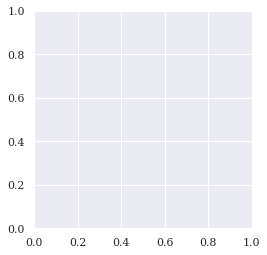

In [9]:
# fig1, ax1 = plt.subplots()
# explode = (0, 0.2)

# ax1.pie(
#         counter.values(), 
#         #explode=counter.values(), 
#         labels=counter.keys(), 
#         autopct='%1.1f%%', 
#         shadow=False, 
#         startangle=90
# )
# ax1.axis('equal')
# plt.show()

# explode = (0, 0.05)

plt.pie(
    counter.values(), 
#     explode= explode,
#     labels = counter.keys(), 
    labels = (['Run faster in SkinnerDB', 'Run faster in DuckDB']),
    colors = tum_colors, 
    autopct='%.0f%%', 
#     pctdistance=0.05,
    startangle=90
)
# plt.title("JOB queries peformance");

# plt.show()

plt.savefig("duck_vs_skinner/job.pdf", bbox_inches="tight")

In [ ]:
# print("skinner_prone_sql[", len(skinner_prone_sql), "] includes: ",skinner_prone_sql)
# print("duck_prone_sql[", len(duck_prone_sql), "] includes: ", duck_prone_sql)

# 🚩 INTERMEDIATES RESULT SAVING
### 4 optimizers: duck_vs_skinner_4.csv
dict_keys(['A20', 'DuckDB', 'SkinnerDB20', 'B20'])\
dict_values([42, 39, 26, 6])

### 2 optimizers: duck_vs_skinner20.csv
dict_keys(['SkinnerDB20', 'DuckDB'])\
dict_values([64, 49])

### 2 optimizers: duck_vs_a20.csv
dict_keys(['A20', 'DuckDB'])\
dict_values([70, 43])

### Loop amount: 
is algorithm still in exploration? did it ever use exploitation?

In [ ]:
for opt in data['optimizer'].unique():
    mean_tmp = data[ data['optimizer'] ==opt ]['loop'].mean()
    print(opt, ' has ', mean_tmp, ' loops in average.')

# 2. Boxplot
1) PreparationTime\
2) ExecutionTime\
3) TotalTime

In [10]:
data_3b = data[data['query'] == '3b.sql']
data_9d = data[data['query'] == '9d.sql']
data_20b = data[data['query'] == '20b.sql']
data_16d = data[data['query'] == '16d.sql']

In [11]:
def boxplotFor(data, title, y, x, ylabel, xlabel='Join order optimizers'):
    boxplot = sns.boxplot(x = data[x],
#                 y = np.power(data[y],4),
#                 y = np.power(data[y],2), 
                y = data[y]*0.001, 
                palette = tum_colors,
                flierprops=green_diamond, 
                whis =1
                )
#                 ,showfliers=False)

    boxplot.axes.set_title(title)
    boxplot.set_xlabel('Setting of hyperparameters')
    boxplot.set_ylabel(ylabel)

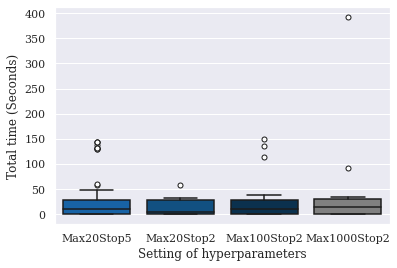

In [13]:
boxplotFor(data, '','total_time', 'optimizer', 'Total time (Seconds)')
plt.savefig("hyperparameters.pdf", bbox_inches="tight")

# data.groupby(['optimizer'])['total_time'].describe()

In [ ]:
# boxplot = sns.boxplot(x = data['optimizer'],
#             y = data['total_time'] * 0.001,
#             palette = tum_colors,
#             flierprops=green_diamond, 
#             whis =1)
# boxplot.set_xlabel('Join order optimizers')
# boxplot.set_ylabel('Total time (millisecond)')

# plt.savefig("duck_vs_skinner/1.pdf", bbox_inches="tight")

In [ ]:
# boxplotFor(data, '','prep_time', 'optimizer', 'Preparation time')
# plt.savefig("duck_vs_skinner/2.pdf")

boxplot = sns.boxplot(x = data['optimizer'],
            y = data['prep_time'] * 0.001,
            palette = tum_colors,
            flierprops=green_diamond, 
            whis =1
            ,showfliers=False)
boxplot.set_xlabel('Join order optimizers')
boxplot.set_ylabel('Preparation time (Second)')
# plt.savefig("duck_vs_skinner/2.pdf", bbox_inches="tight")
plt.savefig("2.pdf", bbox_inches="tight")

In [ ]:
boxplotFor(data, '','exec_time', 'optimizer', 'Execution time')
plt.savefig("3.pdf", bbox_inches="tight")

In [ ]:
# bad_sql = data[data['total_time'] == max(data[data['optimizer'] == 'A100']['total_time'])] # 17b.sql
# data[data['query'] == '17b.sql']

### --------------------------------------- test for four sqls ---------------------------------------

In [ ]:
boxplotFor(data_3b,'Total Time With Different Join Order Optimizer - 3b.sql' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
boxplotFor(data_9d,'Total Time With Different Join Order Optimizer' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
boxplotFor(data_20b,'Total Time With Different Join Order Optimizer' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
boxplotFor(data_16d,'Total Time With Different Join Order Optimizer' ,
               'total_time', 'optimizer', 'Total Time(ms)')

### --------------------------------------- end of test ---------------------------------------

In [ ]:
boxplotFor(data,'Preparation Time With Different Join Order Optimizer' ,
               'prep_time', 'optimizer', 'Preparation Time(ms)')

plt.savefig("compare_prep.pdf", bbox_inches="tight")

In [ ]:
boxplotFor(data,'Execution Time With Different Join Order Optimizer' ,
               'exec_time', 'optimizer', 'Execution Time(ms)')
plt.savefig("compare_exec.pdf", bbox_inches="tight")

In [ ]:
boxplotFor(data,'Total Time With Different Join Order Optimizer' ,
               'total_time', 'optimizer', 'Total Time(ms)')
plt.savefig("compare_total.pdf", bbox_inches="tight")

In [ ]:
# test = data[data['query'] == '3b.sql']
# skinner_avg = data[data['optimizer'] == 'SkinnerDB']['total_time'].mean()
# skinner_max= max(data[data['optimizer'] == 'SkinnerDB']['total_time'])
# skinner_min= min(data[data['optimizer'] == 'SkinnerDB']['total_time'])
# print("[",skinner_min, ",", skinner_max,"], avg = ",skinner_avg)

# duck_avg = data[data['optimizer'] == 'DuckDB']['total_time'].mean()
# duck_max= max(data[data['optimizer'] == 'DuckDB']['total_time'])
# duck_min= min(data[data['optimizer'] == 'DuckDB']['total_time'])
# print("[",duck_min, ",", duck_max,"], avg = ",duck_avg)

In [ ]:
# sns.displot(data[data['optimizer'] == 'SkinnerDB']['total_time'])
# sns.displot(data[data['optimizer'] == 'DuckDB']['total_time'])
#data_longer_than_5k = data[data['total_time']>50000]
#data_longer_than_5k[data_longer_than_5k['query'] == '16d.sql']

# 3. Horizontal stacked bar
1) prep:exec (with log10)

In [ ]:
avg_df = []
avg_df = pd.DataFrame(avg_df)

for opt in data['optimizer'].unique():
    #print(opt)

    avg_prep = data[data['optimizer'] == opt]['prep_time'].mean()
    avg_exec = data[data['optimizer'] == opt]['exec_time'].mean()
#     avg_total = data[data['optimizer'] == opt]['total_time'].mean()
    avg_total = avg_prep + avg_exec
    
    # avg_df[avg_df['optimizer'] == opt][attr] = avg_tmp
    avg_df.loc[opt,'prep_time'] = avg_prep
    avg_df.loc[opt,'exec_time'] = avg_exec
    avg_df.loc[opt,'total_time'] = avg_total
    avg_df.loc[opt,'optimizer'] = opt
    
avg_df

In [ ]:
avg_df_pecentage = []
avg_df_pecentage = pd.DataFrame(avg_df_pecentage)

avg_df_pecentage.loc['DuckDB','prep_time'] = 100*( avg_df.loc['DuckDB','prep_time']/avg_df.loc['DuckDB','total_time'] )
avg_df_pecentage.loc['DuckDB','exec_time'] = 100*( avg_df.loc['DuckDB','exec_time']/avg_df.loc['DuckDB','total_time'] )

avg_df_pecentage.loc['SkinnerDB','prep_time'] = 100*( avg_df.loc['SkinnerDB','prep_time']/avg_df.loc['SkinnerDB','total_time'] )
avg_df_pecentage.loc['SkinnerDB','exec_time'] = 100*( avg_df.loc['SkinnerDB','exec_time']/avg_df.loc['SkinnerDB','total_time'] )

avg_df_pecentage

In [ ]:
# avg_df['prep_time'] = np.log(10*avg_df['prep_time'])
# avg_df['exec_time'] = np.log(np.power(np.log(avg_df['exec_time']),4))

avg_df['prep_time'] = np.log(10*avg_df['prep_time'])/(np.log(10*avg_df['prep_time']) + np.log(10*avg_df['exec_time']))
avg_df['exec_time'] = np.log(10*avg_df['exec_time'])/(np.log(10*avg_df['prep_time']) + np.log(10*avg_df['exec_time']))

avg_df

In [ ]:
s2 = sns.barplot(x='exec_time', y='optimizer', data = avg_df, color = tum_colors[0]) # blue
s1 = sns.barplot(x='prep_time', y='optimizer', data = avg_df, color = tum_colors[1]) # grey

s1.axes.set_title('')
s1.set_xlabel('Preparation Time : Execution Time')
s1.set_ylabel('Join order optimizer')

red_patch = mpatches.Patch(color='#0065BD', label='Execution Time')
black_patch = mpatches.Patch(color='#CCCCC6', label='Preparation Time')
plt.legend(handles=[red_patch, black_patch])

plt.savefig("ratio-hbar.pdf", bbox_inches="tight")

In [ ]:
# # avg of ratio
# duck_pie_data = [data[data['optimizer'] == 'DuckDB']['prep_time'].mean(), 
#                 data[data['optimizer'] == 'DuckDB']['exec_time'].mean()]
# duck_pie_labels = ['Preparation', 'Execution']

# plt.pie(duck_pie_data, labels = duck_pie_labels, colors = tum_colors, autopct='%.3f%%')
# # plt.savefig("duck_vs_skinner/ratio-1.pdf", bbox_inches="tight")

In [ ]:
# skinner_pie_data = [data[data['optimizer'] == 'SkinnerDB']['prep_time'].mean(), 
#                 data[data['optimizer'] == 'SkinnerDB']['exec_time'].mean()]
# skinner_pie_labels = ['Preparation', 'Execution']

# plt.pie(skinner_pie_data, labels = skinner_pie_labels, colors = tum_colors, autopct='%.3f%%')

# 4. JO in duck-prone sql

In [ ]:
test = data[data['query'] == '3b.sql']
test.head()

In [ ]:
#boxplotForTimeWithSQL("total_time", "Total", "3b.sql")
boxplotFor(data[data['query'] == '3b.sql'],'Total Time With Different Join Order Optimizer for 3b.sql' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
skinner_prone_data = data[data['query'].isin(skinner_prone_sql)]
duck_prone_data = data[data['query'].isin(duck_prone_sql)]

### Skinner-prone

In [ ]:
boxplotFor(skinner_prone_data,'Total Time With Different Join Order Optimizer for Skinner-prone query' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
boxplotFor(skinner_prone_data,'Total Time With Different Join Order Optimizer for Skinner-prone query' ,
               'prep_time', 'optimizer', 'Preparation Time(ms)')

In [ ]:
boxplotFor(skinner_prone_data,'Total Time With Different Join Order Optimizer for Skinner-prone query' ,
               'exec_time', 'optimizer', 'Execution Time(ms)')

### Duck-prone

In [ ]:
boxplotFor(duck_prone_data,'Preparation Time With Different Join Order Optimizer for Duck-prone query' ,
               'prep_time', 'optimizer', 'Preparation Time(ms)')

In [ ]:
boxplotFor(duck_prone_data,'Execution Time With Different Join Order Optimizer for Duck-prone query' ,
               'exec_time', 'optimizer', 'Execution Time(ms)')

In [ ]:
boxplotFor(duck_prone_data,'Total Time With Different Join Order Optimizer for Duck-prone query' ,
               'total_time', 'optimizer', 'Total Time(ms)')

In [ ]:
figure(figsize=(20, 6))
boxplot = sns.boxplot(x = duck_prone_data["query"],
                y = data['total_time'],
                hue=data['optimizer'],
                palette = tum_colors,
                flierprops=green_diamond, whis =1)

In [ ]:
# data[data['query']=='6f.sql']
# SIMULATION-FULL:
# Skinner's join_order: 1-2-0-4-3-,0.187, 1789.41, 1789.6
# Duck's join_order:    4-2-1-0-3-,0.39,  2578.26, 2578.64

data [ data['total_time'] == max(data['total_time']) ] # 17e.sql
data[data['query']=='30c.sql']